# Polynomial Regression 
=========================

## Feature Mapping and Regulatisation
*This example demonstrates how a single feature can be used to generate complex models to fit data better than linear regression.   *

### Import libraries 
We will mostly be using numpy for mathematical operations and matplotlib to produce plots 

In [66]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.io as sio
import scipy.optimize as opt

### Load Data

In [67]:
mat = sio.loadmat("../data/ex5data1")
Xdata = mat['X']
y = mat['y'].flatten()

In [68]:
# Validation and Test Data
# (21,1)
Xval  = mat['Xval']
yval  = mat['yval'].flatten()

# Size of dataset
m     = np.shape(Xdata)[0] # samples
mval = np.shape(Xval)[0] # samples in Xval and Xtest sets
n     = np.shape(Xdata)[1] # features 

# Feature Matrix
X     = np.column_stack((np.ones(m),Xdata))
Xval  = np.column_stack((np.ones(mval),Xval))

### Plot Training Data

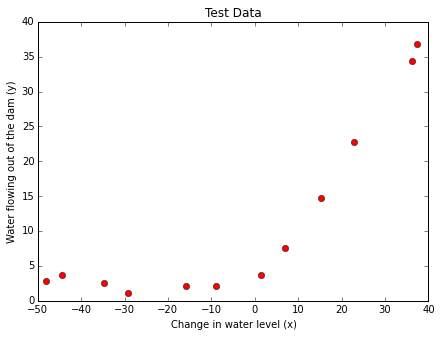

In [69]:
#  --- Plot test data --- #
fig = plt.figure(figsize=(7, 5),facecolor='w', edgecolor='k')
plt.plot(Xdata,y, 'ro')
plt.title('Test Data')
plt.xlabel('Change in water level (x)') 
plt.ylabel('Water flowing out of the dam (y)')
plt.show()

Clearly a linear model is not going to fit this data. We can produce a more complex model by generating new features from our single feature $x$
### Cost Function + Gradient

In [70]:
def linearRegCostFunction(theta,X, y, Lambda,m):

    # Regularised Linear Regression Cost Function
    H = np.dot(X,theta) 
    J = (1./(2*m))*np.sum(np.square(H-y)) + (float(Lambda)/(2*m))*np.sum(np.square(theta[1:]))

    # Regularised Linear Regression Gradient
    theta_reg = np.array([np.insert(theta[1:len(theta)],0,0)])
    grad = (1./m) * np.dot( X.T, H - y) + ( float(Lambda) / m )*theta_reg

    return J,grad[0]

### Feature Mapping

Feature mapping is the process of generating a higher order feature vector to address the problem of underfitting that causes high bias. After feature mapping, the hypothesis has the form:

$h_\theta(x) = \theta_0 + \theta_1 * x_1 + \theta_2 * x_1^2 + ... + \theta_p * x_1^p$  $\hspace{5mm}$(1)

$h_\theta(x)= \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_p x_p$   $\hspace{19mm}$(2)

As seen from (2), this can be treated as a linear regression model in a high dimensional feature space.

In [71]:
def PolyFeatures(Xin,p):
    Xpoly = Xin.copy()
    for i in xrange(p):
        Xpoly = np.insert(Xpoly,Xpoly.shape[1],np.power(Xpoly[:,1],i+2),axis=1)
    return Xpoly

Now that we are dealing with more than 1 feature, we need to normalise these features so that each one has equal weight.

In [72]:
def featureNormalize(Xin):   
    Xnorm = Xin.copy()
    means = np.mean(Xnorm,axis=0) 
    Xnorm[:,1:] = Xnorm[:,1:] - means[1:]
    sigmas = np.std(Xnorm,axis=0,ddof=1)
    Xnorm[:,1:] = Xnorm[:,1:] / sigmas[1:]
    return Xnorm, means, sigmas

In [73]:
# -- Feature Mapping for Polynomial Regression -- #
p = 8

# Map X onto Polynomial Features and Normalize
X_poly = PolyFeatures(X, p)
X_poly, mu, sigma = featureNormalize(X_poly)  # Normalize

# # Map X_poly_val and normalize (using mu and sigma)
X_poly_val = PolyFeatures(Xval, p)
X_poly_val[:,1:] = X_poly_val[:,1:] - mu[1:]
X_poly_val[:,1:] = X_poly_val[:,1:] / sigma[1:]

print('Normalized Training Example 1:')
print('  {:s}  '.format(X_poly[0, :]))

Normalized Training Example 1:
  [ 1.         -0.36214078 -0.75508669  0.18222588 -0.70618991  0.30661792
 -0.59087767  0.3445158  -0.50848117  0.35954927]  


### Train and Plot Hypothesis + Learning Curve

Run optimisation, here we use L-BFGS.

In [74]:
def train(X,y,Lambda,m):
    init_theta = np.zeros((X.shape[1], 1))
    args=(X,y,Lambda,m)
    return opt.minimize(linearRegCostFunction, x0=init_theta, args=args, 
                        options={'disp': False, 'maxiter':200}, method="L-BFGS-B", jac=True)["x"]

when $\lambda = 0$:

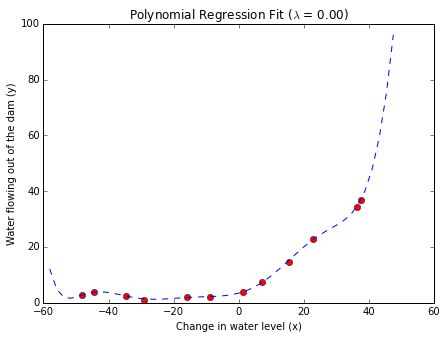

In [75]:
lambda_val = 0.0 # change this value to trade-off under/over -fitting
theta = train(X_poly, y, lambda_val,m)

fig = plt.figure(figsize=(7, 5),facecolor='w', edgecolor='k')
plt.plot(Xdata,y, 'ro')
# Polynomial Plot
n_points = 50
xvals = np.linspace(np.min(X) - 10,np.max(X) + 10,n_points)
xmat = np.ones((n_points,1))

xmat = np.insert(xmat,xmat.shape[1],xvals.T,axis=1)
xmat = PolyFeatures(xmat,len(theta)-2)
#reversing normalisation of features
xmat[:,1:] = xmat[:,1:] - mu[1:]
xmat[:,1:] = xmat[:,1:] / sigma[1:]

plt.plot(xvals,np.dot(xmat,theta) ,'b--')
plt.xlabel('Change in water level (x)') 
plt.ylabel('Water flowing out of the dam (y)')
plt.title ('Polynomial Regression Fit ($\lambda$ = {:.2f})'.format(lambda_val))
plt.show()

In [76]:
def learning_curve(X, y, Xval, yval, Lambda,m):
    # Error/Cost vs number of training samples
    error_train = np.zeros((m, 1))
    error_val   = np.zeros((m, 1))

    for i in xrange(1,m+1):

        X_train = X[:i]
        y_train = y[:i]

        theta = train(X_train, y_train, Lambda,m)

        error_train[i-1],_ = linearRegCostFunction(theta, X_train, y_train,   0, np.shape(X_train)[0])
        error_val[i-1],_   = linearRegCostFunction(theta, Xval, 	 yval,    0, np.shape(Xval)[0])

    return error_train, error_val

Polynomial Regression (lambda = 0.00)


# Training Examples	Train Error	Cross Validation Error

  	1		0.000000	159.093664

  	2		0.000000	158.708138

  	3		0.000000	93.819214

  	4		0.000000	81.272139

  	5		0.000000	6.630801

  	6		0.000000	11.130914

  	7		0.000000	28.193480

  	8		0.000000	61.570239

  	9		0.000000	69.238909

  	10		0.009375	72.756837

  	11		0.008218	31.721726

  	12		0.025133	29.661887



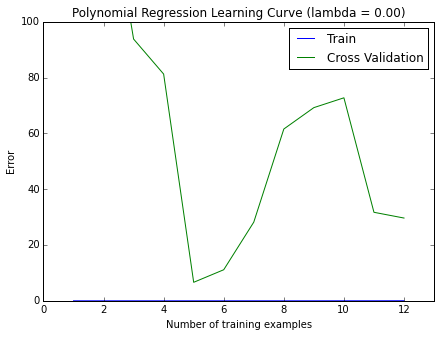

In [77]:
fig = plt.figure(figsize=(7, 5),facecolor='w', edgecolor='k')
error_train, error_val = learning_curve(X_poly, y, X_poly_val, yval, lambda_val,m)
p1, p2 = plt.plot(np.arange(1,m+1), error_train, np.arange(1,m+1), error_val)

plt.title('Polynomial Regression Learning Curve (lambda = {:.2f})'.format(lambda_val))
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 100])
plt.legend((p1, p2), ('Train', 'Cross Validation'))

print('Polynomial Regression (lambda = {:.2f})\n\n'.format(lambda_val))
print('# Training Examples\tTrain Error\tCross Validation Error\n')
for i in xrange(m):
    print('  \t{:d}\t\t{:f}\t{:f}\n'.format(i+1, float(error_train[i]), float(error_val[i])))

When $\lambda = 0.0$, we see the problem of high variance where the model overfits our training data and does not generalise well to unseen data. By increasing $\lambda$ we can try and reduce this variance.

when $\lambda = 0.5$:

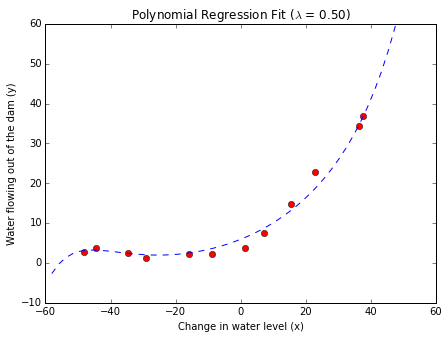

In [78]:
lambda_val = 0.5 # change this value to trade-off under/over -fitting
theta = train(X_poly, y, lambda_val,m)

fig = plt.figure(figsize=(7, 5),facecolor='w', edgecolor='k')
plt.plot(Xdata,y, 'ro')

# Polynomial Plot
xmat = np.ones((n_points,1))
xmat = np.insert(xmat,xmat.shape[1],xvals.T,axis=1)
xmat = PolyFeatures(xmat,len(theta)-2)
#reversing normalisation of features
xmat[:,1:] = xmat[:,1:] - mu[1:]
xmat[:,1:] = xmat[:,1:] / sigma[1:]

plt.plot(xvals,np.dot(xmat,theta) ,'b--')
plt.xlabel('Change in water level (x)') 
plt.ylabel('Water flowing out of the dam (y)')
plt.title ('Polynomial Regression Fit ($\lambda$ = {:.2f})'.format(lambda_val))
plt.show()

Polynomial Regression (lambda = 0.50)


# Training Examples	Train Error	Cross Validation Error

  	1		0.000000	138.839281

  	2		0.024347	143.335229

  	3		0.857650	9.857283

  	4		0.430433	11.368938

  	5		0.345830	9.536575

  	6		0.284926	11.574116

  	7		0.822238	6.541867

  	8		0.798712	6.211150

  	9		1.003948	6.959663

  	10		0.913664	6.875149

  	11		0.831520	6.923923

  	12		1.312831	4.362013



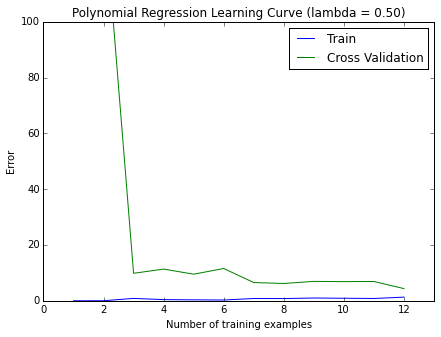

In [79]:
fig = plt.figure(figsize=(7, 5),facecolor='w', edgecolor='k')
error_train, error_val = learning_curve(X_poly, y, X_poly_val, yval, lambda_val,m)
p1, p2 = plt.plot(np.arange(1,m+1), error_train, np.arange(1,m+1), error_val)

plt.title('Polynomial Regression Learning Curve (lambda = {:.2f})'.format(lambda_val))
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 100])
plt.legend((p1, p2), ('Train', 'Cross Validation'))

print('Polynomial Regression (lambda = {:.2f})\n\n'.format(lambda_val))
print('# Training Examples\tTrain Error\tCross Validation Error\n')
for i in xrange(m):
    print('  \t{:d}\t\t{:f}\t{:f}\n'.format(i+1, float(error_train[i]), float(error_val[i])))

When $\lambda=0.5$ we produce a model which causes an increase in the training error, as the number of samples increases, due to the fact that there is less overfitting. However, from the cross-validation error it is apparent that this is a much more desirable model as it performs far better on unseen data. We can increase the value of $\lambda$ further to observe the effects of overfitting vs underfitting.

when $\lambda = 1.0$:

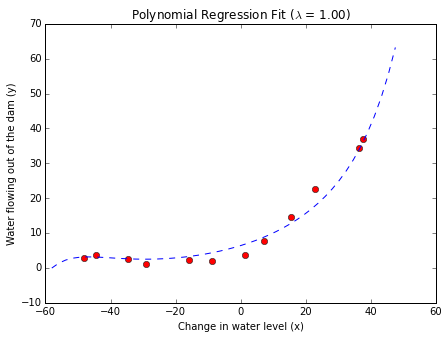

In [80]:
lambda_val = 1.0 # change this value to trade-off under/over -fitting
theta = train(X_poly, y, lambda_val,m)

fig = plt.figure(figsize=(7, 5),facecolor='w', edgecolor='k')
plt.plot(Xdata,y, 'ro')
# Polynomial Plot
n_points = 50
xvals = np.linspace(np.min(X) - 10,np.max(X) + 10,n_points)
xmat = np.ones((n_points,1))

xmat = np.insert(xmat,xmat.shape[1],xvals.T,axis=1)
xmat = PolyFeatures(xmat,len(theta)-2)
#reversing normalisation of features
xmat[:,1:] = xmat[:,1:] - mu[1:]
xmat[:,1:] = xmat[:,1:] / sigma[1:]

plt.plot(xvals,np.dot(xmat,theta) ,'b--')
plt.xlabel('Change in water level (x)') 
plt.ylabel('Water flowing out of the dam (y)')
plt.title ('Polynomial Regression Fit ($\lambda$ = {:.2f})'.format(lambda_val))
plt.show()

Polynomial Regression (lambda = 1.00)


# Training Examples	Train Error	Cross Validation Error

  	1		0.000000	138.846545

  	2		0.045735	143.475966

  	3		2.872153	7.483787

  	4		1.476899	9.030961

  	5		1.195464	7.471057

  	6		0.917024	9.467082

  	7		1.556415	6.194435

  	8		1.409403	6.102127

  	9		1.546503	6.972310

  	10		1.418644	6.875837

  	11		1.287988	6.938449

  	12		2.078663	4.535019



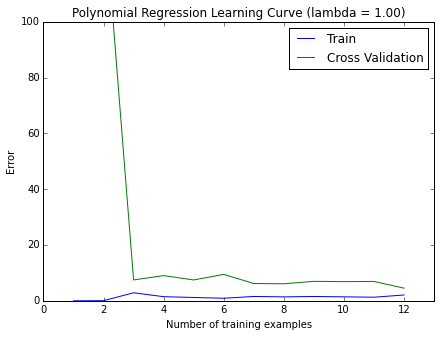

In [81]:
fig = plt.figure(figsize=(7, 5),facecolor='w', edgecolor='k')
error_train, error_val = learning_curve(X_poly, y, X_poly_val, yval, lambda_val,m)
p1, p2 = plt.plot(np.arange(1,m+1), error_train, np.arange(1,m+1), error_val)

plt.title('Polynomial Regression Learning Curve (lambda = {:.2f})'.format(lambda_val))
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 100])
plt.legend((p1, p2), ('Train', 'Cross Validation'))

print('Polynomial Regression (lambda = {:.2f})\n\n'.format(lambda_val))
print('# Training Examples\tTrain Error\tCross Validation Error\n')
for i in xrange(m):
    print('  \t{:d}\t\t{:f}\t{:f}\n'.format(i+1, float(error_train[i]), float(error_val[i])))

when $\lambda = 50.0$:

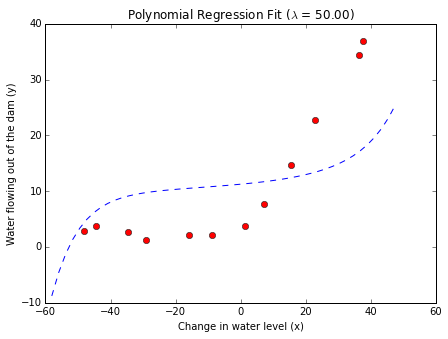

In [82]:
lambda_val = 50.0 # change this value to trade-off under/over -fitting
theta = train(X_poly, y, lambda_val,m)

fig = plt.figure(figsize=(7, 5),facecolor='w', edgecolor='k')
plt.plot(Xdata,y, 'ro')

# Polynomial Plot
xmat = np.ones((n_points,1))
xmat = np.insert(xmat,xmat.shape[1],xvals.T,axis=1)
xmat = PolyFeatures(xmat,len(theta)-2)
#reversing normalisation of features
xmat[:,1:] = xmat[:,1:] - mu[1:]
xmat[:,1:] = xmat[:,1:] / sigma[1:]

plt.plot(xvals,np.dot(xmat,theta) ,'b--')
plt.xlabel('Change in water level (x)') 
plt.ylabel('Water flowing out of the dam (y)')
plt.title ('Polynomial Regression Fit ($\lambda$ = {:.2f})'.format(lambda_val))
plt.show()

Polynomial Regression (lambda = 50.00)


# Training Examples	Train Error	Cross Validation Error

  	1		0.000000	138.846777

  	2		0.112781	144.110455

  	3		96.547189	61.713497

  	4		103.638706	62.549585

  	5		83.033160	49.959057

  	6		78.389545	44.592125

  	7		67.255068	44.671695

  	8		61.118979	43.596619

  	9		57.035901	43.949277

  	10		51.216064	43.988105

  	11		46.943213	44.462131

  	12		46.250465	42.235187



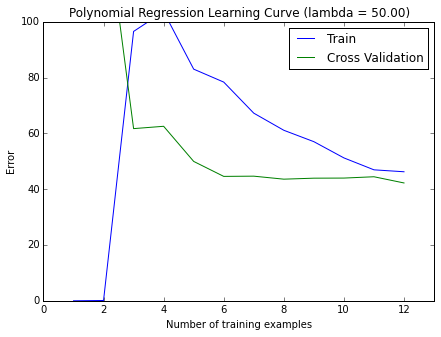

In [83]:
fig = plt.figure(figsize=(7, 5),facecolor='w', edgecolor='k')
error_train, error_val = learning_curve(X_poly, y, X_poly_val, yval, lambda_val,m)
p1, p2 = plt.plot(np.arange(1,m+1), error_train, np.arange(1,m+1), error_val)

plt.title('Polynomial Regression Learning Curve (lambda = {:.2f})'.format(lambda_val))
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 100])
plt.legend((p1, p2), ('Train', 'Cross Validation'))

print('Polynomial Regression (lambda = {:.2f})\n\n'.format(lambda_val))
print('# Training Examples\tTrain Error\tCross Validation Error\n')
for i in xrange(m):
    print('  \t{:d}\t\t{:f}\t{:f}\n'.format(i+1, float(error_train[i]), float(error_val[i])))

Clearly high values of $\lambda$ suffer from high bias due to underfitting. The best value of $\lambda$ should always be determined using an independent set of data - separate to both the training and test data. The next ipython notebook will illustrate how this value can be selected and what effect this has on the test data.